# Notebook 1 - Introduction to Jupyter, exploring/manipulating data with Pandas and plotting with Matplotlib

- Feature engineering: Date

## Introduction to Jupyter notebooks

*Optional*

You can add extended functionalities by installing `conda install -c conda-forge jupyter_contrib_nbextensions`. This will add a tab to your dashboard, from where you can select the extension. By far the most useful in my opinion is the collapsible heading extension in combination with the table of contents extensions, which allow you to get a lot more organized!

For changing the look of the notebook, you want to run `pip install jupyterthemes`. This will allow you to select different themes. For more information visit: https://github.com/dunovank/jupyter-themes

### How to use these notebooks

Do **NOT** just execute all the cells and feel good about it! To learn, open a new notebook and type everything yourself. Use the Jupyter notebook functionalities (see below). Looking at the solution is allowed but **no Copy-Paste**.

If you are not that familiar with Python and the concepts presented here, your goal should be to do replicate the steps in these notebooks with as little peaking as possible. If you are more advanced, try to solve the additional challenges below.


### Basic usage

To start a Jupyter notebook, simply type `jupyter notebook in the command line`. If you do this locally (e.g. on your laptop) this should automatically open up a browser window with the dashboard. We will cover remote usage below.

On the dashboard you can see all files in your current directory. (Note that you can click on any file and edit it.) Jupyter notebook files end in `.ipynb`. To create a new notebook, click on `New` and select a Python version. Now a new tab will appear with your empty notebook.

### Cells

Jupyter notebooks have cells such as this one. There are different types of cells. The two you will use most frequently are code cells and Markdown cells. This here is a Markdown cell, which allows you to write formatted text using Markdown. For a quick Markdown introduction, check out: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

Note that in markdown you can also type Latex:

$x=\frac{a}{b}$

To switch the cell type, either use the toolbar above or press `y` for code and `m` for markdown in command mode, which we will get to now.

### Modes

To navigate Jupyter notebooks there are two modes: Command mode, which you can enter by pressing `esc` and edit mode which you can enter by pressing `Enter`. In edit mode you edit inside a cell, while in command mode you can edit the cells themselves. If you get confused about all the keys just press `h` in command mode, which will bring up a list of all keyboard shortcuts. Of course, you can also use the mouse and the toolbar.

### Executing a cell

To execute a cell, press `Shift + Enter`. This will run the code or render the text and jump to the next cell. If you would like to insert a cell below, type `Alt + Enter`.

Now let's start by actually writing some code.

In [1]:
# Import modules just as you would in a regular Python script
import numpy as np
import matplotlib.pyplot as plt
# This will allow you to display plots inside the notebook.
%matplotlib inline

In [2]:
# Assign variables
a = 10

In [3]:
# The value of the last object in the cell will be displayed
b = 2
a

10

In [4]:
a + b

12

You do not have to work chronologically. You can always edit cells above.

But pay attention: This means that the notebook might throw an error when executed in chronological order after restarting the kernel.

### Get function docs

Next, let's create a basic plot and also note a super-handy functionality of the notebook: When using a function and pressing `Shift + Tab` when the cursor is inside the function parenthesis, it will bring up the list of arguments. Pressing it twice will bring up the doc string.

Similarly, executing `?function_name` will bring up the doc string in a separate window. `??function_name` will bring up the source code.

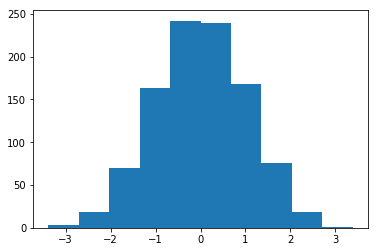

In [5]:
plt.hist(np.random.normal(size=1000))
plt.show()

In [6]:
?plt.hist

In [7]:
??plt.hist

### Sharing a notebook

Here are several ways to share a Jupyter notebook.

**GitHub**

If the notebook is in a GitHub repository (which it probably should be!), GitHub will simply render the notebook for you like this: https://github.com/raspstephan/ESS-Python-Tutorial/blob/master/notebooks/jupyter-intro.ipynb

**NBViewer**

Another option is to copy the GitHub URL to http://nbviewer.jupyter.org/.

**As HTML or PDF**

You can also export the notebook to HTML or PDF by typing `jupyter nbconvert --to FORMAT notebook.ipynb` where `FORMAT` can be `pdf`, `html` or many others.

More information here: https://ipython.org/ipython-doc/3/notebook/nbconvert.html

### Remote setup

Now let's see how we can use Jupyter notebooks remotely.

** Port tunnel**

If you want to run Jupyter on a remote computer, you need to create a port tunnel in order to open the notebook locally in the browser. The command to do this is:

`ssh -L localhost:8888:localhost:8888 user@host`

This will create a tunnel for port 8888. If you do your actual computations on a different node, you can do the same thing to create a tunnel to that node:

`ssh -L localhost:8888:localhost:8888 c-3-39`

Now locally in your browser, go to `localhost:8888`. Most probably it will ask you for a token. You will find the token in the terminal where Jupyter is running, where it will look something like this:

`http://localhost:8888/?token=940f1a436d91bde5ef15e3640dd66bd7d3f724a68513c99f`

Just copy and paste the token after = and you should be good to go.

**Screen**

Since remote connections die sometimes (or all the time), it is really handy to use screen. Screen enables you to run processes remotely, which will continue even after your connection has timed out.

To start a screen session, just type `screen`. To execute screen commands, you need to press `Ctrl + a` followed by a command. `c` will create a new window. `n` and `p` will go to the next and previous window. k will kill the window. Finally, `d` will detach from the window. To log back into a screen session after detaching or having been disconnected, simply type `screen -r`.

Here is more information about screen: http://aperiodic.net/screen/quick_reference

**Mounting**

Finally, to edit remote files in your preferred editor (PyCharm, VSC, etc.), you might want to mount a remote directory. For Linux/Mac you can use sshfs. On the Mac you have to install OSXFuse. Here is a link outlining the process: https://blogs.harvard.edu/acts/2013/11/08/the-newbie-how-to-set-up-sshfs-on-mac-os-x/

Then you can mount a remote directory: `sshfs srasp@gplogin1.ps.uci.edu:/export/home/srasp/ greenplanet_home/`

## Exploring and manipulating data with Pandas plus some basic plotting - Post-processing NWP forecasts

Our first dataset will be a postprocessing dataset. Our aim is to correct biases of NWP temperature forecasts. The forecasts are ensemble means of the ECMWF TIGGE archive. The corresponding observations are taken at DWD surface stations. 

In [8]:
DATADIR = '/local/S.Rasp/ML-Workshop-Data/'

In [9]:
# Command line with !; $to use local variables in command line
!ls $DATADIR

pp_all.csv		  pp_solution.csv  pp_train.csv
pp_sample_submission.csv  pp_test.csv


The first dataset we will use in this workshop is tabular. Tabular data are what you would use in Excel. To work with tabular data in Python, we will use Pandas. Pandas is very widely used which means that you will find an answer to any question you can think of online. Here is a quick overview of basic functionalities: https://pandas.pydata.org/pandas-docs/stable/basics.html

Tabular data files are often saved as `.csv` files which we can easily read into a Pandas `DataFrame`.

There are two datasets: a training and a test datset. First, let's ignore the test set and open the training set.

In [10]:
import pandas as pd
# Don't worry about this statement. This just suppresses warnings later on.
pd.options.mode.chained_assignment = None

In [11]:
!head $f'{DATADIR}pp_train.csv'

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,u_pl850_fc_mean,v_pl850_fc_mean,q_pl850_fc_mean,cape_fc_mean,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,1.2,2011-01-01,3,-0.022290079,107.43946,202.0,50.7827,6.0941,4.7604675,-4.907918,5619.513,5.040613,-2.4240947,0.0020729504,2.517037,101379.51,98.05601,634981.4,39645.008,2.2089093,0.75530154,2433034.8,-3513225.0,273.57892,374.63348
1,1.6,2011-01-01,44,2.0864146,19.397774,44.0,52.9335,8.237,14.442179,-10.303844,5579.092,16.77781,-6.1201735,0.0017127863,1.8534747,101709.04,98.7418,1592483.9,370638.6,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.6035
2,-6.3,2011-01-01,71,-6.609096,604.885,759.0,48.2156,8.9784,0.25433925,-6.2813725,5614.9375,0.8365133,-0.2675586,0.002297013,1.3541166,94432.85,91.60234,-1416809.8,-239365.98,-0.39441925,-0.95084035,4320586.0,-4435227.5,265.47473,437.

Let's load this dataset into a Pandas DataFrame.

In [12]:
# Time how long it takes to read file
%time df_train = pd.read_csv(f'{DATADIR}pp_train.csv', index_col=0)

CPU times: user 3.99 s, sys: 312 ms, total: 4.3 s
Wall time: 3.81 s


### Explore data

In [13]:
# Before we play around with the data, let's save a copy
df_train_raw = df_train.copy()
# But watch out for RAM usage for larger datasets!

In [14]:
# Show the first five rows. .tail() for the last five
df_train.head()

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,-4.907918,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,-10.303844,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,-6.281372,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,-10.044441,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,-9.078665,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [15]:
# How many rows
len(df_train)

980562

In [16]:
df_train.columns

Index(['t2m_obs', 'time', 'station', 't2m_fc_mean', 'orog', 'station_alt',
       'station_lat', 'station_lon', 'u_pl500_fc_mean', 'v_pl500_fc_mean',
       'gh_pl500_fc_mean', 'u_pl850_fc_mean', 'v_pl850_fc_mean',
       'q_pl850_fc_mean', 'cape_fc_mean', 'sp_fc_mean', 'tcc_fc_mean',
       'sshf_fc_mean', 'slhf_fc_mean', 'u10_fc_mean', 'v10_fc_mean',
       'ssr_fc_mean', 'str_fc_mean', 'd2m_fc_mean', 'sm_fc_mean'],
      dtype='object')

![title](images/variables.png)

In [17]:
df_train.describe()

,t2m_obs,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
count,908857.000000,980562.000000,980562.000000,980562.000000,980562.000000,980562.000000,980562.000000,980562.000000,980562.000000,980562.000000,...,980562.000000,980562.000000,9.805620e+05,9.805620e+05,980562.000000,980562.000000,9.805620e+05,9.805620e+05,980562.000000,886600.000000
mean,7.531618,3726.726257,7.305595,295.234511,289.700186,50.812609,10.184040,8.823780,-0.302459,5607.319530,...,98167.966711,61.148280,-1.767204e+06,-8.152601e+06,0.792879,0.643888,1.928963e+07,-9.371092e+06,277.832031,343.767861
std,6.579644,2719.500011,6.718977,234.161776,278.959584,1.915865,2.084653,10.804031,10.906147,148.716669,...,2799.084576,31.656075,4.201333e+06,5.924629e+06,2.601944,1.994099,1.228819e+07,3.442328e+06,6.616596,61.335377
min,-26.200000,3.000000,-21.508630,-1.427856,0.000000,47.398600,6.024400,-34.023964,-51.873432,4976.940000,...,84283.160000,0.000000,-3.243611e+07,-5.462550e+07,-14.955598,-15.886876,3.300497e+05,-2.136808e+07,247.132420,64.123955
25%,2.800000,1639.000000,2.331773,67.390170,72.000000,49.244500,8.576100,1.466554,-6.884149,5507.763700,...,96367.070000,34.416545,-4.712416e+06,-1.300108e+07,-1.076624,-0.712025,7.668573e+06,-1.182197e+07,273.451382,308.552310
50%,7.800000,3348.000000,7.676022,296.438720,238.000000,50.736400,10.048000,8.571194,0.297703,5629.717300,...,98335.900000,67.456060,-1.958288e+06,-7.106672e+06,0.762717,0.707770,1.845740e+07,-9.528052e+06,278.301150,358.254030
75%,12.500000,5277.000000,12.487657,436.711360,440.000000,52.178900,11.813300,15.717412,7.203771,5719.493700,...,100424.337500,90.847860,8.736628e+05,-2.717170e+06,2.310319,1.861252,2.953434e+07,-7.014966e+06,282.778200,385.054400
max,30.400000,15555.000000,26.242172,1268.067900,2964.000000,55.011000,14.950600,53.232000,37.145084,5940.681000,...,104708.470000,100.000000,1.657920e+07,9.008404e+06,21.202560,18.126524,5.411776e+07,1.604214e+06,293.593700,541.179440


In [18]:
# Display the data type of each column
df_train.dtypes

t2m_obs             float64
time                 object
station               int64
t2m_fc_mean         float64
orog                float64
station_alt         float64
station_lat         float64
station_lon         float64
u_pl500_fc_mean     float64
v_pl500_fc_mean     float64
gh_pl500_fc_mean    float64
u_pl850_fc_mean     float64
v_pl850_fc_mean     float64
q_pl850_fc_mean     float64
cape_fc_mean        float64
sp_fc_mean          float64
tcc_fc_mean         float64
sshf_fc_mean        float64
slhf_fc_mean        float64
u10_fc_mean         float64
v10_fc_mean         float64
ssr_fc_mean         float64
str_fc_mean         float64
d2m_fc_mean         float64
sm_fc_mean          float64
dtype: object

Each column is a Pandas Series.

In [19]:
# Home many unique stations
df_train.station.nunique(), df_train['station'].nunique()

(537, 537)

In [20]:
df_train.time.min(), df_train.time.max()

('2011-01-01', '2015-12-31')

In [21]:
df_train.t2m_obs.mean(),df_train.t2m_fc_mean.mean()

(7.531618395413346, 7.305594593821011)

Pandas Series objects have some build in plotting functionality with is based on Matplotlib.

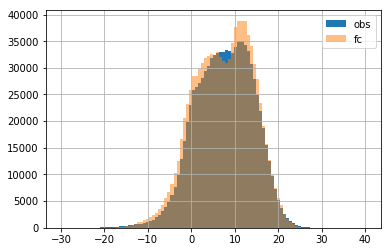

In [22]:
df_train.t2m_obs.hist(range=(-30, 40), bins=100, label='obs')
df_train.t2m_fc_mean.hist(range=(-30, 40), bins=100, alpha=0.5, label='fc')
plt.legend();

Another convenient way to plot tabular data is Seaborn: https://seaborn.pydata.org/

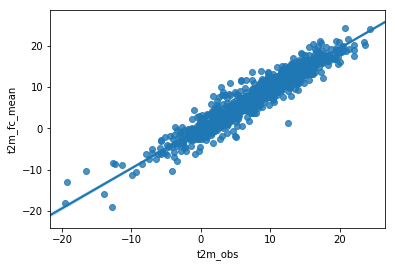

In [23]:
import seaborn as sns
# Only take every 1000th value
sns.regplot(data=df_train.iloc[::1000], x='t2m_obs', y='t2m_fc_mean');

### Clean the dataset

Next we need to check whether there are missing values and what to do with them

In [24]:
# What is the fraction of missing values for each column
df_train.apply(pd.Series.isna).mean()

t2m_obs             0.073126
time                0.000000
station             0.000000
t2m_fc_mean         0.000000
orog                0.000000
station_alt         0.000000
station_lat         0.000000
station_lon         0.000000
u_pl500_fc_mean     0.000000
v_pl500_fc_mean     0.000000
gh_pl500_fc_mean    0.000000
u_pl850_fc_mean     0.000000
v_pl850_fc_mean     0.000000
q_pl850_fc_mean     0.000000
cape_fc_mean        0.000000
sp_fc_mean          0.000000
tcc_fc_mean         0.000000
sshf_fc_mean        0.000000
slhf_fc_mean        0.000000
u10_fc_mean         0.000000
v10_fc_mean         0.000000
ssr_fc_mean         0.000000
str_fc_mean         0.000000
d2m_fc_mean         0.000000
sm_fc_mean          0.095825
dtype: float64

There are two columns with missing values: `t2m_obs` and `sm_fc_mean`. The first one is the variable we want to predict. If we don't have the answer, we cannot use it for training our algorithms. For this reason we will throw these rows away. The second is just a predictor variable. Here we don't want to throw the entire row away. One way to deal with these missing values is to set the value to the mean over all samples.

In [25]:
# Drop rows where observations are missing
df_train.dropna(subset=['t2m_obs'], inplace=True)

In [26]:
# Replace missing sm_fc_mean values with the column mean
df_train['sm_fc_mean'].replace(np.nan, df_train.sm_fc_mean.mean(), inplace=True)

### Split data into features (inputs) and targets (outputs)

To train our algorithm we need to split the variables we want to give the algorithm to make a prediction and the variable it should predict, in our case `t2m_obs`. Furthermore we will throw away the variables which we are not using at this time: `time` and `station`. These variables might be useful, but are not simple continuous variables and require some more thought.

In [27]:
# Split features and targets
# At the moment we only want continuous variables in the data set
# so we will throw away the station ID, along with the time
X_train = df_train.drop(['t2m_obs', 'time', 'station'], axis=1)
y_train = df_train['t2m_obs']

### Normalize input data

Many machine learning algorithms require all the features to have the same order of magnitude for reasons we will see later. The simplest way to achieve this is to subtract the mean and divide by the standard deviation.

In [28]:
X_train = (X_train - X_train.mean()) / X_train.std()

In [29]:
X_train.head()

,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,u_pl850_fc_mean,v_pl850_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,-1.085537,-0.806304,-0.319616,-0.014388,-1.988359,-0.375583,-0.420998,0.082273,0.032273,-0.589303,...,1.153825,1.165866,0.571970,1.383392,0.551740,0.058768,-1.371728,1.699146,-0.637595,0.524749
1,-0.772045,-1.182264,-0.890327,1.113170,-0.962599,0.520713,-0.916043,-0.189695,1.584633,-1.304124,...,1.271600,1.187512,0.800075,1.439388,2.107265,0.081871,-1.372214,2.224538,-0.412719,0.764039
2,-2.064770,1.317913,1.692322,-1.360192,-0.607706,-0.792744,-0.547005,0.051487,-0.523761,-0.172229,...,-1.328921,0.962162,0.083173,1.336190,-0.456843,-0.807191,-1.217983,1.431614,-1.860869,1.593406
3,-1.836220,0.705375,0.178854,-1.150334,1.341568,-0.585835,-0.892244,-0.128645,0.182835,-0.380077,...,-0.279698,0.947549,0.432299,1.280152,0.441155,-0.154016,-1.108971,0.776981,-1.555712,0.385818
4,-0.823013,-1.061694,-0.814473,0.878201,-1.117882,0.257640,-0.803640,-0.128599,1.245830,-1.128760,...,1.168232,1.201311,0.762755,1.480936,1.428789,0.017412,-1.373112,2.175315,-0.488854,-1.374796


### Preprocessing in one function

In [30]:
def preproc(df_in, means=None, stds=None):
    df = df_in.copy()
    if 't2m_obs' in df.columns: df.dropna(subset=['t2m_obs'], inplace=True)
    df['sm_fc_mean'].replace(np.nan, df['sm_fc_mean'].mean(), inplace=True)
    
    y = df.pop('t2m_obs') if 't2m_obs' in df.columns else None
    X = df.drop(['time', 'station'], 1)
    
    if means is None: means = X.mean()
    if stds  is None: stds  = X.std()
    
    X = (X - means) / stds
    return X, y, means, stds

In [31]:
X_train, y_train, means, stds = preproc(df_train)

### Training, test and validation sets
The first thing you will notice is that the test set does not have the `t2m_obs` column. So what are these different datasets?

- Training set: Data used to optimize the machine learning algorithm
- Validation set: Data used to independently verify the skill of the algorithm
- Test set: Another independent set used for final verification. In this case the solutions are hidden (I have them, hehe)

In [32]:
# Read test dataset
%time df_test = pd.read_csv(f'{DATADIR}pp_test.csv', index_col=0)

CPU times: user 1.35 s, sys: 48 ms, total: 1.4 s
Wall time: 686 ms


In [33]:
len(df_train), len(df_test)

(908857, 182218)

In [34]:
df_train.time.min(), df_train.time.max()

('2011-01-01', '2015-12-31')

In [35]:
df_test.time.min(), df_test.time.max()

('2016-01-01', '2016-12-31')

There is no target information in the test dataset. Only I have it, haha! 

Which means we cannot use this dataset for checking the skill of our algorithm.

In [36]:
df_train.columns, df_test.columns

(Index(['t2m_obs', 'time', 'station', 't2m_fc_mean', 'orog', 'station_alt',
        'station_lat', 'station_lon', 'u_pl500_fc_mean', 'v_pl500_fc_mean',
        'gh_pl500_fc_mean', 'u_pl850_fc_mean', 'v_pl850_fc_mean',
        'q_pl850_fc_mean', 'cape_fc_mean', 'sp_fc_mean', 'tcc_fc_mean',
        'sshf_fc_mean', 'slhf_fc_mean', 'u10_fc_mean', 'v10_fc_mean',
        'ssr_fc_mean', 'str_fc_mean', 'd2m_fc_mean', 'sm_fc_mean'],
       dtype='object'),
 Index(['time', 'station', 't2m_fc_mean', 'orog', 'station_alt', 'station_lat',
        'station_lon', 'u_pl500_fc_mean', 'v_pl500_fc_mean', 'gh_pl500_fc_mean',
        'u_pl850_fc_mean', 'v_pl850_fc_mean', 'q_pl850_fc_mean', 'cape_fc_mean',
        'sp_fc_mean', 'tcc_fc_mean', 'sshf_fc_mean', 'slhf_fc_mean',
        'u10_fc_mean', 'v10_fc_mean', 'ssr_fc_mean', 'str_fc_mean',
        'd2m_fc_mean', 'sm_fc_mean'],
       dtype='object'))

To get a validation skill that fairly represents operational conditions, we will also split by time.

In [37]:
split_date = '2015-01-01'

It's important to use the same means and stds to normalize each dataset.

In [38]:
X_train, y_train, means, stds = preproc(df_train[df_train.time < split_date])

In [39]:
X_valid, y_valid, _, _ = preproc(df_train[df_train.time >= split_date], means, stds)

In [40]:
X_test, _, _, _ = preproc(df_test, means, stds)

In [41]:
X_train.shape, X_valid.shape, X_test.shape

((728008, 22), (180849, 22), (182218, 22))

### Save preprocessed datasets

Let's save these datasets so we can load them in a different notebook. The easiest way to save Python objects is Pickle.

In [42]:
import pickle

In [43]:
!mkdir -p ./data
with open('./data/preproc_data.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_valid, y_valid, X_test), f)

In [44]:
# To load
with open('./data/preproc_data.pkl', 'rb') as f:
    X_train, y_train, X_valid, y_valid, X_test = pickle.load(f)

## Your turn

Now it's your turn. If you are not very familiar with what I have just presented, just open up a new notebook and try to replicate all the steps with as little "cheating" as possible. If you are a pro and this was easy, here are some challenges for you!

1. We will use the mean squared error (MSE) as a metric for our forecast skill. What is the MSE of the raw forecast?
2. How much can you improve the MSE by simply correcting the bias?
3. Does the bias depend on the time of year?

### Compute the MSE of the raw forecast

In [45]:
((df_train.t2m_obs - df_train.t2m_fc_mean) ** 2).mean()

3.8667748393126327

### Simple bias correction

In [46]:
bias = (df_train.t2m_obs - df_train.t2m_fc_mean).mean(); bias

0.25204668264974084

In [47]:
# Create new column with bias corrected forecasts
df_train['t2m_fc_bc'] = df_train.t2m_fc_mean + bias

In [48]:
((df_train.t2m_obs - df_train.t2m_fc_bc) ** 2).mean()

3.8032473090780905

### Does the bias depend on the time of year

In [49]:
df_train['error'] = df_train.t2m_obs - df_train.t2m_fc_mean

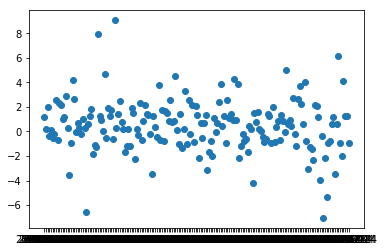

In [50]:
plt.scatter(df_train.time[::5000], df_train.error[::5000])

In [55]:
df_train['month'] = pd.DatetimeIndex(df_train['time']).month

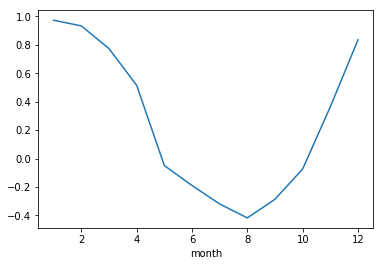

In [59]:
df_train.groupby('month').mean().error.plot()

### Bonus: Plot station locations on map with cartopy

In [60]:
# Get unique stations lats and lons
stats = list(np.unique(df_train.station))
lats = [df_train.station_lat[df_train.station == s].iloc[0] for s in stats]
lons = [df_train.station_lon[df_train.station == s].iloc[0] for s in stats]
alts = [df_train.station_alt[df_train.station == s].iloc[0] for s in stats]

In [61]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

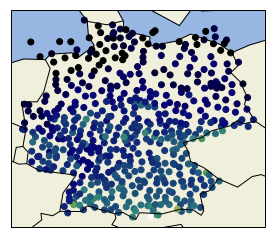

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(lons, lats, c=alts, cmap='gist_earth')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAKES, alpha=0.5)
